# Risques Cardio-Vasculaires  


Ce job va vous permettre de mettre en œuvre les Randoms Forest.  

Vous travaillez dans le domaine de la médecine préventive. Votre métier est donc de donner des conseils d'hygiène de vie (propreté, mais aussi diététique, encouragement à un sport ou une activité physique, ergonomie et manière de faire des efforts, prévention des comportements à risque, etc.) ainsi que de proposer un accompagnement dans le dépistage de maladies et plus spécifiquement dans la prévention des risques cardio-vasculaire. 

Entre 300 000 et 400 000 accidents cardiovasculaires surviennent chaque année en France, dont un tiers sont mortels. Comment mieux prédire le risque cardiovasculaire ? Si plusieurs facteurs de risque sont identifiés, quelles sont les interactions entre ces facteurs ? Les maladies cardiovasculaires, principalement les accidents vasculaires cérébraux (AVC) et les infarctus du myocarde, sont la deuxième cause de mortalité en France. La liste des facteurs de risque cardiovasculaire est malheureusement longue : dépression, diabete, antécédents familiaux, obésité, sexe, tabagisme, sédentarité, dyslipidémies, abus alcool, hypertension, troubles du sommeil, âge

Les 12 facteurs de risque constituent ainsi un véritable réseau de facteurs de risque cardiovasculaire.
En fonction de ces interactions, des chercheurs ont pu mettre en évidence 4 groupes de facteurs de risque :
Des «facteurs non modifiables» (le sexe, l’âge et les antécédents familiaux) : ils prédisent d’autres facteurs, mais ne peuvent pas être prédits par d’autres facteurs.
Des «facteurs liés au mode de vie» (le tabagisme, la sédentarité, l’alcoolisme) : ils prédisent beaucoup d’autres facteurs (sauf les facteurs non modifiables), mais sont très peu prédits par d’autres facteurs.
Des «facteurs cliniques en amont» (les troubles du sommeil, l’obésité, la dépression) : ils prédisent beaucoup d’autres facteurs et sont eux-mêmes prédits par de nombreux facteurs.
Des «facteurs cliniques en aval» (l’hypertension artérielle, les dyslipidémies, le diabète) : ils prédisent très peu de facteurs, mais sont en revanche prédits par beaucoup de facteurs.  

Pour vous accompagner au mieux dans votre démarche de prévention de ces risques cardio-vasculaires, vous avez décidé de développer un outil permettant de poser un diagnostic rapide de risques cardio-vasculaires. Cet outil mettra en œuvre un algorithme de machine learning (de classification binaire : prédiction binaire : 0 ou 1) permettant de prédire s’il y a un risque cardio-vasculaire ou s’il n’y en a pas.

## Présentation des données  

Pour pouvoir entraîner votre algorithme, vous avez monté un partenariat avec des médecins généralistes de votre ville et ainsi pu récolter des données de patients. Ces données sont stockées dans un fichier .csv. Ce fichier comporte 12 colonnes :

* AGE : integer (number of days)
* HEIGHT : integer (cm) 
* WEIGHT : integer (kg)
* GENDER : categorical (1: female, 2: male)
* AP_HIGH : systolic blood pressure, integer
* AP_LOW : diastolic blood pressure, integer 
* CHOLESTEROL : categorical (1: normal, 2: above normal, 3: well above normal)
* GLUCOSE : categorical (1: normal, 2: above normal, 3: well above normal)
* SMOKE : categorical (0: no, 1: yes)
* ALCOHOL : categorical (0: no, 1: yes)
* PHYSICAL_ACTIVITY : categorical (0: no, 1: yes)

et la variable cible :  

* CARDIO_DISEASE:  categorical (0: no, 1: yes)  

## To-Do  

En vous appuyant sur ces données, Construisez un modèle de Random Forest permettant de prédire qui sont les sujets à risque !

* Réaliser une veille sur les Random Forest  
* Utiliser un jupyter-notebook pour le travail qui suit  
* Visualiser et analyser les données avec les librairies Matplotlib et Seaborn  
* Résoudre le cas d’étude présenté ci-dessus avec la librairie Scikit-Learn (exploration des données, préparation des données, modélisation, le test et l’interprétation des résultats)  
* Prédire si Arthur 53 ans, fumeur, sportif, 175 cm, 85 kg, avec un taux de cholestérol au dessus de la normal et un taux de glucose normal, une tension artérielle systolique dans la moyenne et une pression sanguine diastolique correspondant à la moyenne du 3e quartile (50%-75%) du jeu de données, est un sujet à risques cardio-vasculaires  
* Rendre accessible votre notebook via Github  
* Partager votre lien github  

***Groupe BLUE : Constant Roger Dan Olivier Wien Pierre-Etienne Sacia***

## Ressources  

* https://docs.google.com/document/d/1QA6Taf__0gUcNQ2aQKI1if-9WUcS-nndBVOZcQugkws/edit  
* https://docs.google.com/document/d/1fAVqIUVNFvWHI2M5eBaYbU1fHFFUAJyRjK0RSL4zGcI/edit?ts=600e8b3f  
  
  
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html?highlight=minmax#sklearn.preprocessing.MinMaxScaler  
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html  
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV  
  
  
* https://www.kaggle.com/sociopath00/random-forest-using-gridsearchcv  
* https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74  
* https://www.youtube.com/watch?v=7C_YpudYtw8  


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from pandas_profiling import ProfileReport

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report, confusion_matrix

print(__doc__)
pd.set_option('display.max_columns', None)
sns.set()
%matplotlib inline


Automatically created module for IPython interactive environment


In [2]:
df = pd.read_csv('./data/cardio_train.csv', sep=';', index_col=0)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
#df['age'] = np.floor(df['age'] / 365.25)

### Perte d'informations IMPORTANTE si conversion de l'âge JOURS => ANNEES  !!!

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [5]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'height'}>],
       [<AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'ap_hi'}>,
        <AxesSubplot:title={'center':'ap_lo'}>],
       [<AxesSubplot:title={'center':'cholesterol'}>,
        <AxesSubplot:title={'center':'gluc'}>,
        <AxesSubplot:title={'center':'smoke'}>],
       [<AxesSubplot:title={'center':'alco'}>,
        <AxesSubplot:title={'center':'active'}>,
        <AxesSubplot:title={'center':'cardio'}>]], dtype=object)

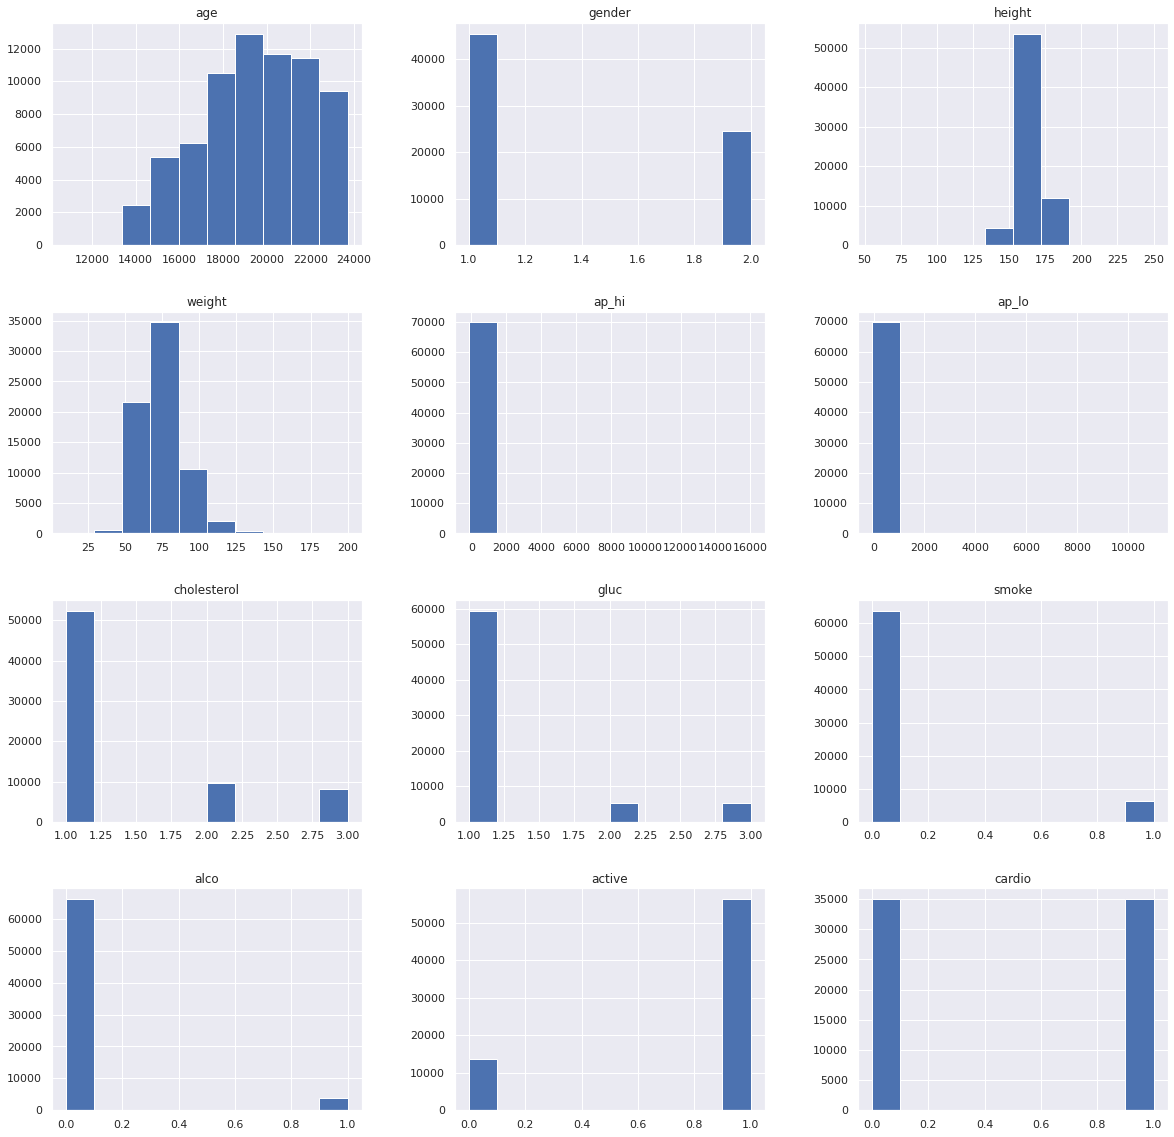

In [6]:
df.hist(figsize=(20, 20))

### OUTLIERS on SYSTOLIC (AP_HI) & DIASTOLIC (AP_LO) ???

In [7]:
print('ap_hi', df['ap_hi'].describe(), '\n\nap_lo', df['ap_lo'].describe())

ap_hi count    70000.000000
mean       128.817286
std        154.011419
min       -150.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: ap_hi, dtype: float64 

ap_lo count    70000.000000
mean        96.630414
std        188.472530
min        -70.000000
25%         80.000000
50%         80.000000
75%         90.000000
max      11000.000000
Name: ap_lo, dtype: float64


### STD deviation is VERY important !!!

In [8]:
def remove_outliers(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    # Interquartile range
    iqr = q3 - q1
    fence_low  = q1 - 1.5 * iqr
    fence_high = q3 + 1.5 * iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [9]:
from scipy import stats

def drop_numerical_outliers(df, z_thresh=3):
    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
    constrains = df.select_dtypes(include=[np.number]) \
        .apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    # Drop (inplace) values set to be rejected
    df.drop(df.index[~constrains], inplace=True)

In [10]:
print('With outliers\t\t\t\t', df.shape)
df_clean = remove_outliers(df, 'ap_hi')
print('AP_HI clean up by quantile method\t', df_clean.shape)
df_clean = remove_outliers(df_clean, 'ap_lo')
print('AP_LO clean up by quantile method\t', df_clean.shape)
drop_numerical_outliers(df_clean)
print('AP_HI & LO clean up by STD method\t', df_clean.shape)


With outliers				 (70000, 12)
AP_HI clean up by quantile method	 (66866, 12)
AP_LO clean up by quantile method	 (63710, 12)
AP_HI & LO clean up by STD method	 (51374, 12)


In [11]:
df_clean.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,51374.000000,51374.000000,51374.000000,51374.000000,51374.000000,51374.000000,51374.000000,51374.000000,51374.0,51374.0,51374.000000,51374.000000
mean,19468.441741,1.298595,164.034628,73.066003,125.883910,81.521373,1.267373,1.073870,0.0,0.0,0.799821,0.487017
std,2459.481045,0.457646,7.511230,12.805296,13.661284,7.533937,0.576051,0.261562,0.0,0.0,0.400138,0.499836
min,14282.000000,1.000000,141.000000,32.000000,95.000000,66.000000,1.000000,1.000000,0.0,0.0,0.000000,0.000000
25%,17674.000000,1.000000,159.000000,64.000000,120.000000,80.000000,1.000000,1.000000,0.0,0.0,1.000000,0.000000
50%,19698.000000,1.000000,164.000000,71.000000,120.000000,80.000000,1.000000,1.000000,0.0,0.0,1.000000,0.000000
75%,21323.000000,2.000000,169.000000,80.000000,135.000000,90.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000
max,23713.000000,2.000000,188.000000,116.000000,167.000000,104.000000,3.000000,2.000000,0.0,0.0,1.000000,1.000000


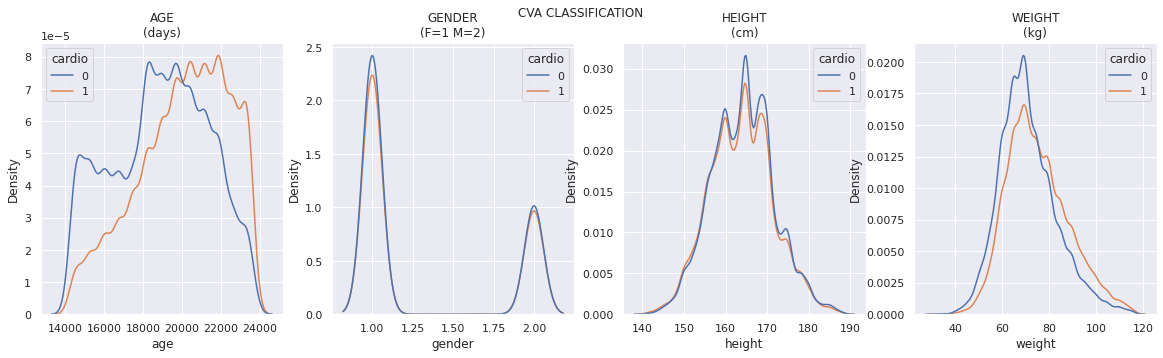

In [12]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

fig.suptitle('CVA CLASSIFICATION')
axes[0].set_title('AGE\n(days)')
axes[1].set_title('GENDER\n(F=1 M=2)')
axes[2].set_title('HEIGHT\n(cm)')
axes[3].set_title('WEIGHT\n(kg)')

sns.kdeplot(ax=axes[0], data=df_clean, x="age", hue="cardio")
sns.kdeplot(ax=axes[1], data=df_clean, x="gender", hue="cardio")
sns.kdeplot(ax=axes[2], data=df_clean, x="height", hue="cardio")
sns.kdeplot(ax=axes[3], data=df_clean, x="weight", hue="cardio")

plt.show()


### DISEASE is mostly beside AGE MAX.  
### GENDER & HEIGHT have no impact.  
### There's a little shift of WEIGHT DISEASE trace to the right, to higher weights ...
### WEIGHT has to be correlated with HEIGHT for analysis.  
### It should be better to replace HEIGHT & WEIGHT by IMC = Weight(kg)/(Height(m)**2) ...

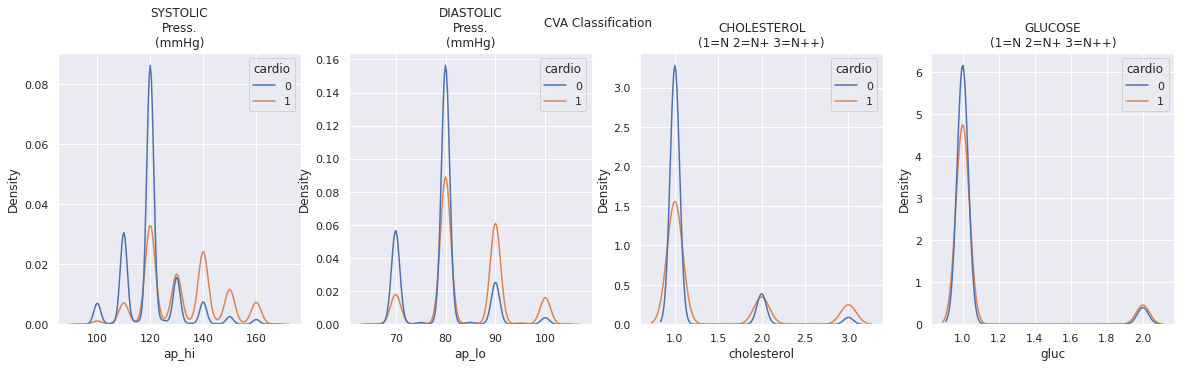

In [13]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

fig.suptitle('CVA Classification')
axes[0].set_title('SYSTOLIC\nPress.\n(mmHg)')
axes[1].set_title('DIASTOLIC\nPress.\n(mmHg)')
axes[2].set_title('CHOLESTEROL\n(1=N 2=N+ 3=N++)')
axes[3].set_title('GLUCOSE\n(1=N 2=N+ 3=N++)')

sns.kdeplot(ax=axes[0], data=df_clean, x="ap_hi", hue="cardio")
sns.kdeplot(ax=axes[1], data=df_clean, x="ap_lo", hue="cardio")
sns.kdeplot(ax=axes[2], data=df_clean, x="cholesterol", hue="cardio")
sns.kdeplot(ax=axes[3], data=df_clean, x="gluc", hue="cardio")

plt.show()


###  More DISEASE with HIGH PRESSURE for AP_HI & LO.
### Cholesterol has clearly impact !
### Less DISEASE with NORMAL glucose.

/home/olivier/anaconda3/envs/dev_IA/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/olivier/anaconda3/envs/dev_IA/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/olivier/anaconda3/envs/dev_IA/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/olivier/anaconda3/envs/dev_IA/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


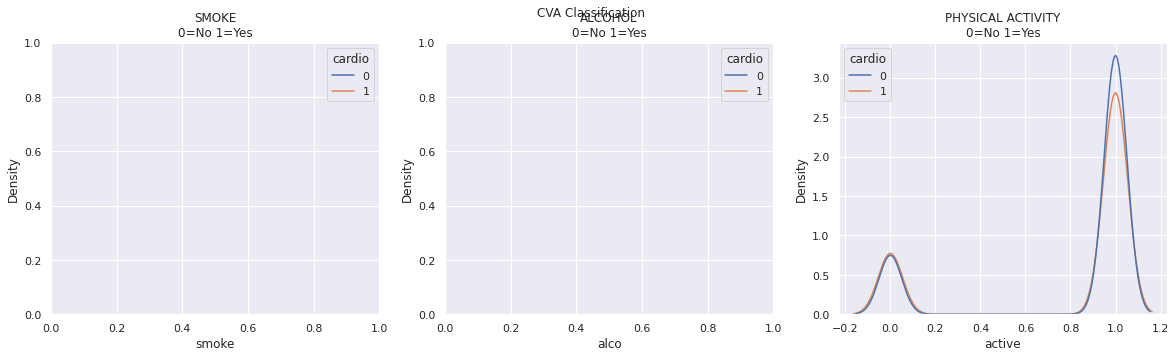

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

fig.suptitle('CVA Classification')
axes[0].set_title('SMOKE\n0=No 1=Yes')
axes[1].set_title('ALCOHOL\n0=No 1=Yes')
axes[2].set_title('PHYSICAL ACTIVITY\n0=No 1=Yes')

sns.kdeplot(ax=axes[0], data=df_clean, x="smoke", hue="cardio")
sns.kdeplot(ax=axes[1], data=df_clean, x="alco", hue="cardio")
sns.kdeplot(ax=axes[2], data=df_clean, x="active", hue="cardio")

plt.show()


### OUTLIERS were the smokers & alcohol drinkers ?!! Let's have a look WITH outliers (df) ...

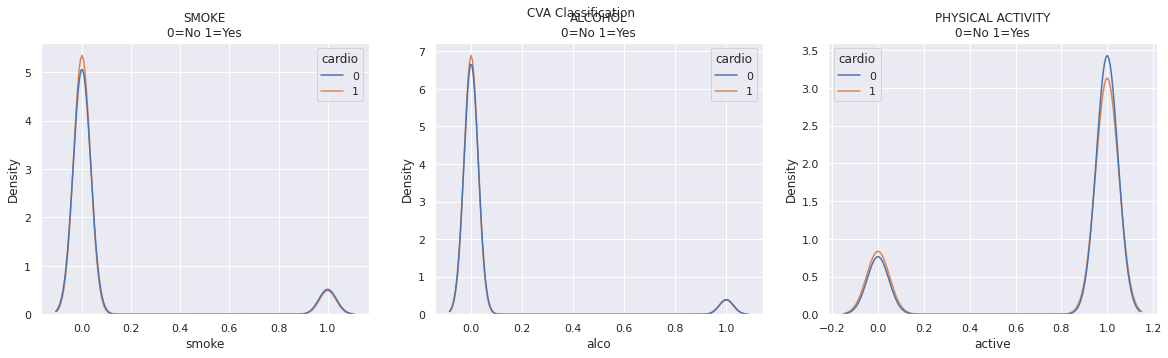

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

fig.suptitle('CVA Classification')
axes[0].set_title('SMOKE\n0=No 1=Yes')
axes[1].set_title('ALCOHOL\n0=No 1=Yes')
axes[2].set_title('PHYSICAL ACTIVITY\n0=No 1=Yes')

sns.kdeplot(ax=axes[0], data=df, x="smoke", hue="cardio")
sns.kdeplot(ax=axes[1], data=df, x="alco", hue="cardio")
sns.kdeplot(ax=axes[2], data=df, x="active", hue="cardio")

plt.show()

### SMOKE & ALCOHOL have NO IMPACT.
### LESS disease if physical activity.

In [16]:
# smoke & alco have no impact
df_clean.drop(columns=['smoke', 'alco'],
        axis=1,
        inplace=True)

In [17]:
profile = ProfileReport(df_clean, title="CVA Classification Report")
profile

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51374 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          51374 non-null  int64  
 1   gender       51374 non-null  int64  
 2   height       51374 non-null  int64  
 3   weight       51374 non-null  float64
 4   ap_hi        51374 non-null  int64  
 5   ap_lo        51374 non-null  int64  
 6   cholesterol  51374 non-null  int64  
 7   gluc         51374 non-null  int64  
 8   active       51374 non-null  int64  
 9   cardio       51374 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 4.3 MB


In [19]:
# Target = CARDIO with DISEASE = 1 & HEALTHY = 0
y = np.array(df_clean.iloc[:, 9].copy())
y.shape

(51374,)

In [20]:
# Features = all columns except CARDIO
X = np.array(df_clean.iloc[:, 0:9].copy())
X.shape


(51374, 9)

In [21]:
# 51374 : 80% => 41100 for TRAIN ; 20% => 10274 for TEST
X_train = X[0:41101, :]
X_test = X[41101:51374, :]
y_train = y[0:41101]
y_test = y[41101:51374]

print("X_train", X_train.shape, "y_train", y_train.shape)
print("X_test", X_test.shape, "y_test", y_test.shape)

X_train (41101, 9) y_train (41101,)
X_test (10273, 9) y_test (10273,)


Text(0.5, 0, 'Relative Importance')

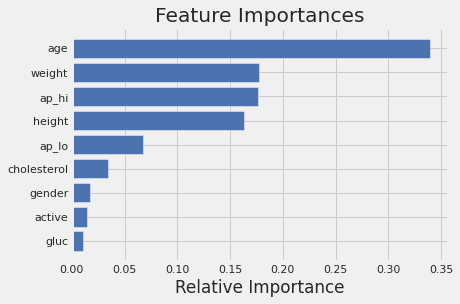

In [22]:
RF = RandomForestClassifier(oob_score=True, random_state=None)
RF.fit(X_train, y_train)

importances = RF.feature_importances_
indices = np.argsort(importances)
liste_variables = list(df_clean.columns)

# style du graphique 
plt.style.use('fivethirtyeight')
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [liste_variables[i] for i in indices])
plt.xlabel('Relative Importance')

### !!! ADVICE : order columns as features IMPORTANCE !!!

In [23]:
y_pred = RF.predict(X_test)
y_pred_proba = RF.predict_proba(X_test)

print('HEALTHY proba = {:.0%}'.format(y_pred_proba[:, 0].mean()))
print('DISEASE proba = {:.0%}'.format(y_pred_proba[:, 1].mean()))


HEALTHY proba = 51%
DISEASE proba = 49%


### My model (with proba almost 0,5) works as well as CHANCE :-(

In [24]:
print('ACCURACY\t{:.2%}'.format(RF.score(X_test, y_test)))
print('OOB score\t{:.2%}'.format(RF.oob_score_))

ACCURACY	69.94%
OOB score	70.11%


In [25]:
print("CLASSIFICATION REPORT with 0=HEALTHY & 1=DISEASE\n\n", classification_report(y_test, y_pred))

CLASSIFICATION REPORT with 0=HEALTHY & 1=DISEASE

               precision    recall  f1-score   support

           0       0.70      0.73      0.71      5309
           1       0.70      0.67      0.68      4964

    accuracy                           0.70     10273
   macro avg       0.70      0.70      0.70     10273
weighted avg       0.70      0.70      0.70     10273



CONFUSION MATRIX
 [[3859 1450]
 [1638 3326]]


<AxesSubplot:>

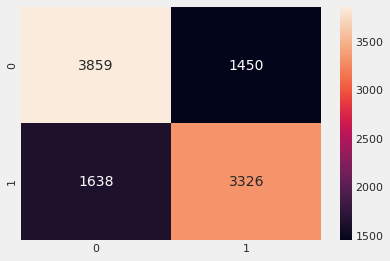

In [26]:
CM = confusion_matrix(y_test, y_pred)
print("CONFUSION MATRIX\n", CM)
sns.heatmap(CM, annot=True, fmt=".0f")

In [27]:
print('Prédire si Arthur ...\n')

# Arthur 53 ans (age), fumeur (smoke=1), sportif (active=1), 175 cm (height), 85 kg (weight),
# avec un taux de cholestérol au dessus de la normal (cholesterol=2, 3)
# et un taux de glucose normal (glucose=1),
# une tension artérielle systolique dans la moyenne
A_ap_hi = df.ap_hi.mean()
print('Arthur SYST = {:.0f} mmHg'.format(A_ap_hi))

# et une pression sanguine diastolique correspondant
# à la moyenne du 3e quartile (50%-75%) du jeu de données
A_ap_lo = df.ap_lo.quantile(q=[0.5, 0.75]).mean()
print('Arthur DIAST = {:.0f} mmHg\n'.format(A_ap_lo))

# est un sujet à risques cardio-vasculaires

Arthur = [[53, 2, 175, 85, A_ap_hi, A_ap_lo, 2, 1, 1]]
Arthur_pred = RF.predict(Arthur)
Arthur_pred_proba = RF.predict_proba(Arthur)

#0   age
#1   gender
#2   height
#3   weight
#4   ap_hi
#5   ap_lo
#6   cholesterol
#7   gluc
#8  active

print('Arthur HEALTHY proba = {:.0%}'.format(Arthur_pred_proba[0, 0]))
print('Arthur DISEASE proba = {:.0%}\n'.format(Arthur_pred_proba[0, 1]))

if Arthur_pred:
    print("PREDICTION => DISEASE :-( Arthur est sujet à risques cardio-vasculaires")
else:
    print("PREDICTION => HEALTHY :-) Arthur n'est PAS sujet à risques cardio-vasculaires")


Prédire si Arthur ...

Arthur SYST = 129 mmHg
Arthur DIAST = 85 mmHg

Arthur HEALTHY proba = 65%
Arthur DISEASE proba = 35%

PREDICTION => HEALTHY :-) Arthur n'est PAS sujet à risques cardio-vasculaires


In [28]:
print('Prédire si Arthur NON SPORTIF ...\n')
Arthur_inactive = [[53, 2, 175, 85, A_ap_hi, A_ap_lo, 2, 1, 0]]
Arthur_inactive_pred = RF.predict(Arthur)
Arthur_inactive_pred_proba = RF.predict_proba(Arthur)

print('Arthur HEALTHY proba = {:.0%}'.format(Arthur_inactive_pred_proba[0, 0]))
print('Arthur DISEASE proba = {:.0%}\n'.format(Arthur_inactive_pred_proba[0, 1]))

if Arthur_inactive_pred:
    print("PREDICTION => DISEASE :-( Arthur est sujet à risques cardio-vasculaires")
else:
    print("PREDICTION => HEALTHY :-) Arthur n'est PAS sujet à risques cardio-vasculaires")


Prédire si Arthur NON SPORTIF ...

Arthur HEALTHY proba = 65%
Arthur DISEASE proba = 35%

PREDICTION => HEALTHY :-) Arthur n'est PAS sujet à risques cardio-vasculaires


In [29]:
print('Prédire si Arthur CHOLESTEROL NORMAL\n')
Arthur_ch_plus = [[53, 2, 175, 85, A_ap_hi, A_ap_lo, 1, 1, 1]]
Arthur_ch_plus_pred = RF.predict(Arthur)
Arthur_ch_plus_pred_proba = RF.predict_proba(Arthur)

print('Arthur HEALTHY proba = {:.0%}'.format(Arthur_inactive_pred_proba[0, 0]))
print('Arthur DISEASE proba = {:.0%}\n'.format(Arthur_inactive_pred_proba[0, 1]))

if RF.predict(Arthur_ch_plus):
    print("DISEASE :-( Arthur est sujet à risques cardio-vasculaires")
else:
    print("HEALTHY :-) Arthur n'est PAS sujet à risques cardio-vasculaires")


Prédire si Arthur CHOLESTEROL NORMAL

Arthur HEALTHY proba = 65%
Arthur DISEASE proba = 35%

HEALTHY :-) Arthur n'est PAS sujet à risques cardio-vasculaires


In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
# 51374 samples : 80% => 41100 for TRAIN ; 20% => 10274 for TEST
X_scaled_train = X[0:41101, :]
X_scaled_test = X[41101:51374, :]

print("SCALED X_train", X_scaled_train.shape, "y_train", y_train.shape)
print("SCALED X_test", X_scaled_test.shape, "y_test", y_test.shape)

SCALED X_train (41101, 9) y_train (41101,)
SCALED X_test (10273, 9) y_test (10273,)


Text(0.5, 0, 'Relative Importance')

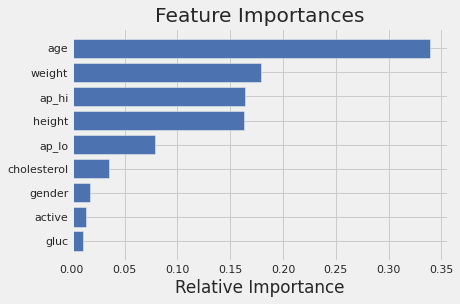

In [32]:
RF.fit(X_scaled_train, y_train)

importances = RF.feature_importances_
indices = np.argsort(importances)
liste_variables = list(df_clean.columns)

# style du graphique 
plt.style.use('fivethirtyeight')
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [liste_variables[i] for i in indices])
plt.xlabel('Relative Importance')

In [33]:
y_pred = RF.predict(X_scaled_test)
y_pred_proba = RF.predict_proba(X_scaled_test)

print('HEALTHY proba = {:.0%}'.format(y_pred_proba[:, 0].mean()))
print('DISEASE proba = {:.0%}'.format(y_pred_proba[:, 1].mean()))


HEALTHY proba = 51%
DISEASE proba = 49%


### My model (with proba almost 0,5) works as well as CHANCE :-(

In [34]:
print('ACCURACY\t{:.2%}'.format(RF.score(X_scaled_test, y_test)))
print('OOB score\t{:.2%}'.format(RF.oob_score_))

ACCURACY	69.53%
OOB score	69.93%


In [35]:
print("CLASSIFICATION REPORT with 0=HEALTHY & 1=DISEASE\n\n", classification_report(y_test, y_pred))

CLASSIFICATION REPORT with 0=HEALTHY & 1=DISEASE

               precision    recall  f1-score   support

           0       0.70      0.72      0.71      5309
           1       0.69      0.66      0.68      4964

    accuracy                           0.70     10273
   macro avg       0.70      0.69      0.69     10273
weighted avg       0.70      0.70      0.70     10273



CONFUSION MATRIX
 [[3843 1466]
 [1664 3300]]


<AxesSubplot:>

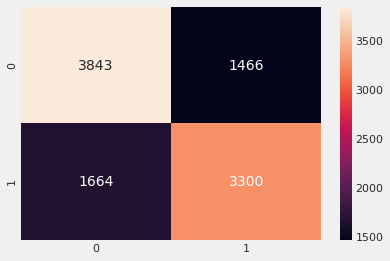

In [36]:
CM = confusion_matrix(y_test, y_pred)
print("CONFUSION MATRIX\n", CM)
sns.heatmap(CM, annot=True, fmt=".0f")

In [37]:
print('Prédire si Arthur ...\n')

Arthur = [[53, 2, 175, 85, A_ap_hi, A_ap_lo, 2, 1, 1]]
Arthur_pred = RF.predict(Arthur)
Arthur_pred_proba = RF.predict_proba(Arthur)

print('Arthur HEALTHY proba = {:.0%}'.format(Arthur_pred_proba[0, 0]))
print('Arthur DISEASE proba = {:.0%}\n'.format(Arthur_pred_proba[0, 1]))

if Arthur_pred:
    print("PREDICTION => DISEASE :-( Arthur est sujet à risques cardio-vasculaires")
else:
    print("PREDICTION => HEALTHY :-) Arthur n'est PAS sujet à risques cardio-vasculaires")



Prédire si Arthur ...

Arthur HEALTHY proba = 66%
Arthur DISEASE proba = 34%

PREDICTION => HEALTHY :-) Arthur n'est PAS sujet à risques cardio-vasculaires


In [38]:
RF.get_params(deep=True)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [39]:
from sklearn.model_selection import GridSearchCV

random_state = None

# Thanks to past iterations with GridSearchCV
max_depth = 9
max_features = 'auto'
criterion = 'gini'

rfc = RandomForestClassifier(
    max_depth=max_depth,
    max_features=max_features,
    criterion=criterion,
    oob_score=True,
    random_state=random_state,
    n_jobs=-1
)

param_grid = {
    'n_estimators': [500, 1000],
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, n_jobs=-1)
CV_rfc.fit(X_scaled_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(max_depth=9, n_jobs=-1,
                                              oob_score=True),
             n_jobs=-1, param_grid={'n_estimators': [500, 1000]})

In [40]:
CV_rfc.best_params_

{'n_estimators': 500}

In [41]:
model = CV_rfc.best_estimator_
model.get_params(deep=True)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

HEALTHY proba = 51.36%
DISEASE proba = 48.64%

ACCURACY	72.85%
OOB score	72.81%

CLASSIFICATION REPORT with 0=HEALTHY & 1=DISEASE

               precision    recall  f1-score   support

           0       0.71      0.80      0.75      5309
           1       0.75      0.65      0.70      4964

    accuracy                           0.73     10273
   macro avg       0.73      0.73      0.73     10273
weighted avg       0.73      0.73      0.73     10273

CONFUSION MATRIX
 [[4236 1073]
 [1716 3248]]


<AxesSubplot:>

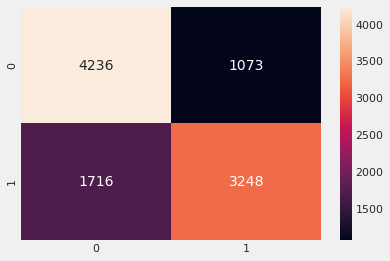

In [42]:
model.fit(X_scaled_train, y_train)
y_pred = model.predict(X_scaled_test)
y_pred_proba = model.predict_proba(X_scaled_test)

print('HEALTHY proba = {:.2%}'.format(y_pred_proba[:, 0].mean()))
print('DISEASE proba = {:.2%}\n'.format(y_pred_proba[:, 1].mean()))

print('ACCURACY\t{:.2%}'.format(model.score(X_scaled_test, y_test)))
print('OOB score\t{:.2%}\n'.format(model.oob_score_))

print("CLASSIFICATION REPORT with 0=HEALTHY & 1=DISEASE\n\n", classification_report(y_test, y_pred))

CM = confusion_matrix(y_test, y_pred)
print("CONFUSION MATRIX\n", CM)
sns.heatmap(CM, annot=True, fmt=".0f")

### Classes predictions probability are TOO close to CHANCE !
### My model IS NOT ready for production :-(
### Only BAGGING method has been used.
### Let's see LATER for VOTING & BOOSTING ;-)